<a href="https://colab.research.google.com/github/ttaye165/github-introfall25-ttaye165/blob/main/sys_3501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to Run the Code:
1. Download the dataset from Kaggle:
https://www.kaggle.com/datasets/raymondtoo/the-world-university-rankings-2016-2024
The World University Rankings (2016–2024)
2. Unzip the downloaded file to obtain the CSV file.
3. Save the CSV file to your Desktop or Google Drive (Google Drive is recommended if using Google Colab).
4.Update the file path in the code to point to the location of the CSV file.
5. Run the code to reproduce the analysis.
* Make sure to have all Python packages downloaded



UNIVERSITY RANKINGS ANALYSIS (2016-2025)

Libraries imported successfully!

LOADING DATA
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Dataset loaded successfully!
  Shape: (14522, 14)
  Years covered: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
  Number of countries: 115

First 5 rows:
   Rank                                   Name         Country  \
0   1.0     California Institute of Technology   United States   
1   2.0                   University of Oxford  United Kingdom   
2   3.0                    Stanford University   United States   
3   4.0                University of Cambridge  United Kingdom   
4   5.0  Massachusetts Institute of Technology   United States   

   Student Population  Students to Staff Ratio International Students  \
0              2243.0                  

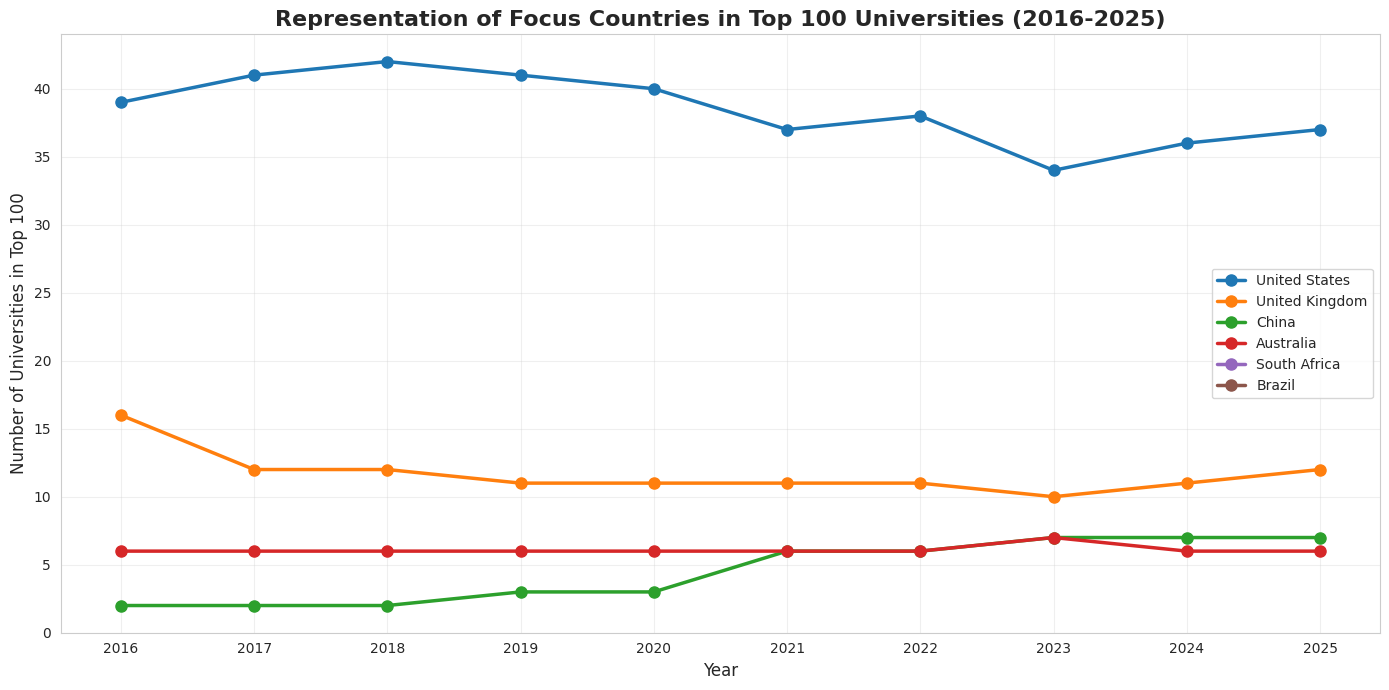


2. Creating bar plot: Overall country distribution...


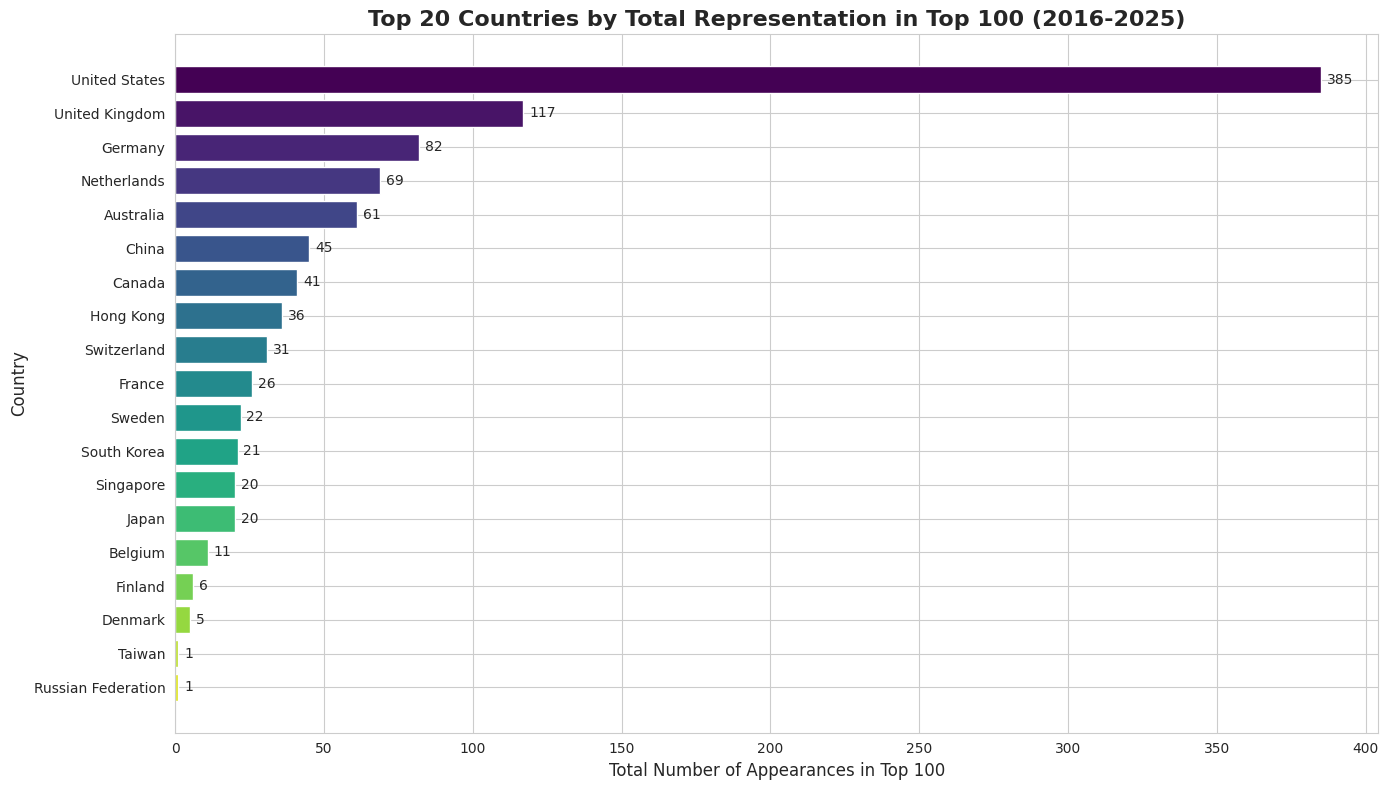


3. Creating histogram: Overall score distribution...


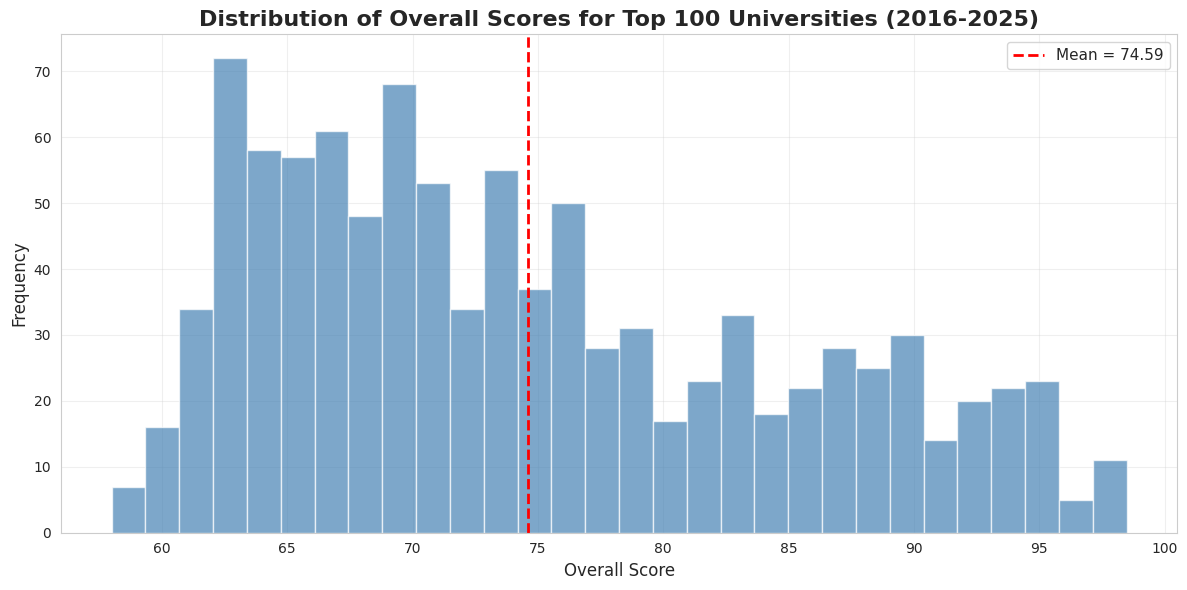


4. Creating grouped bar plot: Period comparison...


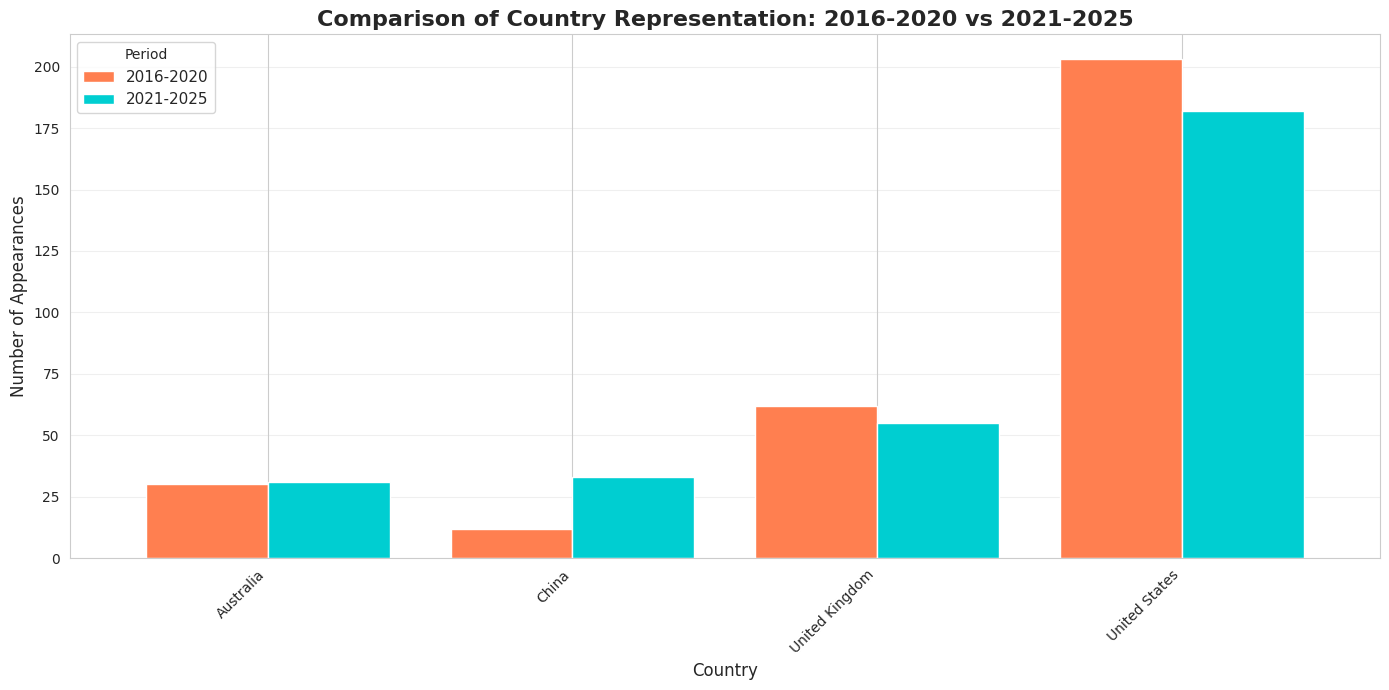


5. Creating heatmap: Correlation matrix...


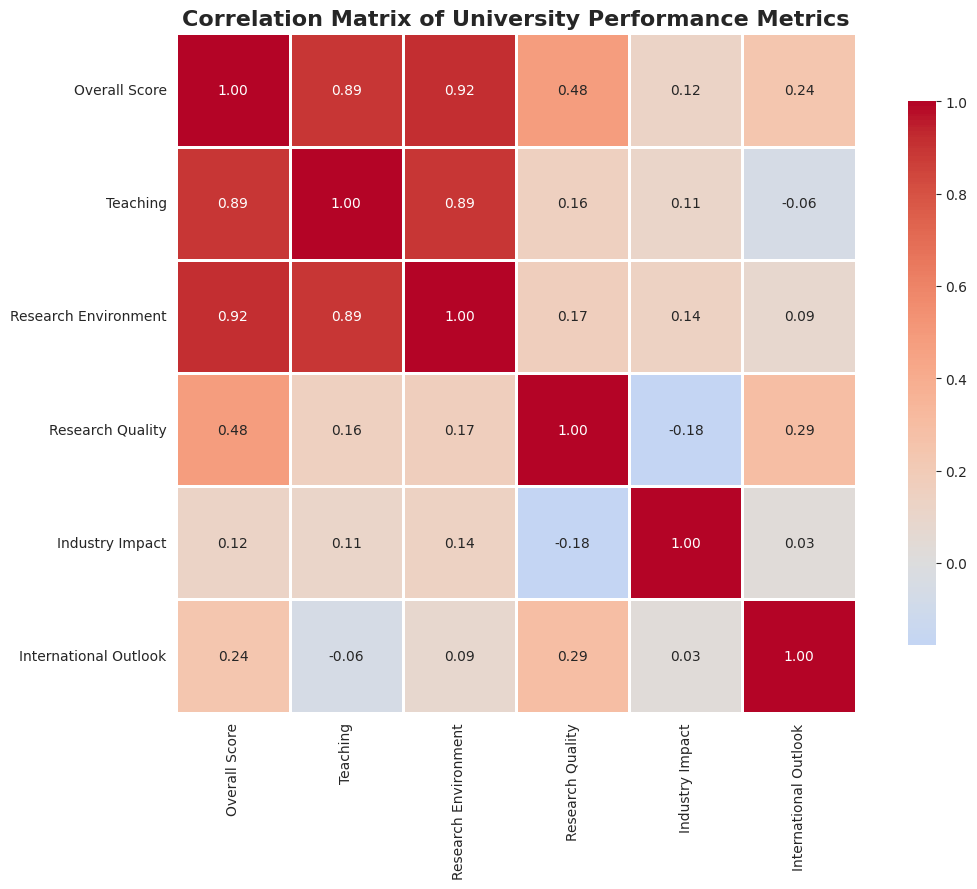


6. Creating box plot: Score distribution by country...


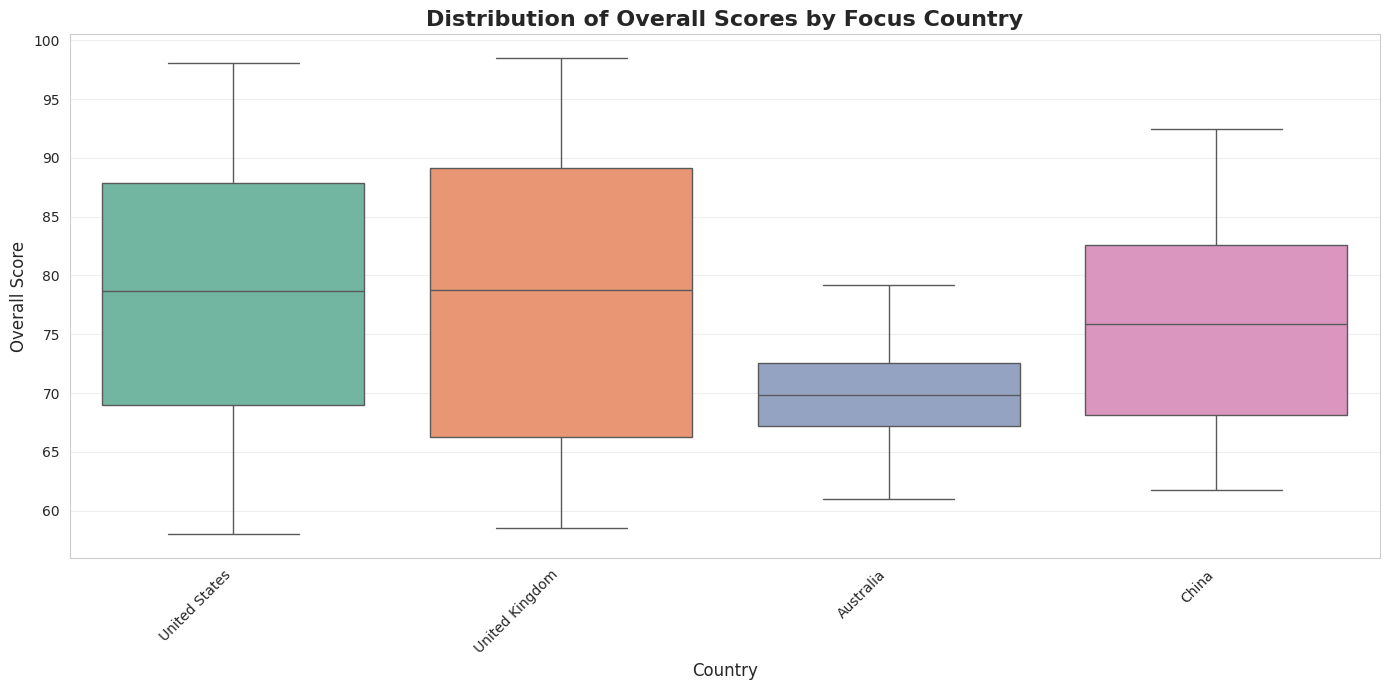


✓ All visualizations created successfully!

FEATURE ENGINEERING

✓ New Features Created:
  • High_Performer: Binary indicator for above-median overall score
  • Top_50: Binary indicator for rank ≤ 50
  • Is_US, Is_UK, Is_China: Country indicators
  • Is_Western: Indicator for Western countries
  • Research_Strength: Average of research metrics
  • Year_Numeric: Years since 2016

PREPARING DATA FOR MODELING

✓ Train-Test Split Complete:
  Training set: 700 samples (70.0%)
  Testing set: 300 samples (30.0%)
  Features: 9

MODEL 1: LOGISTIC REGRESSION
Predicting: High Performer (Overall Score >= Median)

Feature Coefficients:
              Feature  Coefficient
             Teaching     1.516061
     Research Quality     1.419238
 Research Environment     1.405125
International Outlook     0.389416
                Is_US     0.202196
      Industry Impact     0.167059
         Year_Numeric     0.045536
                Is_UK    -0.006857
             Is_China    -0.185608

=================

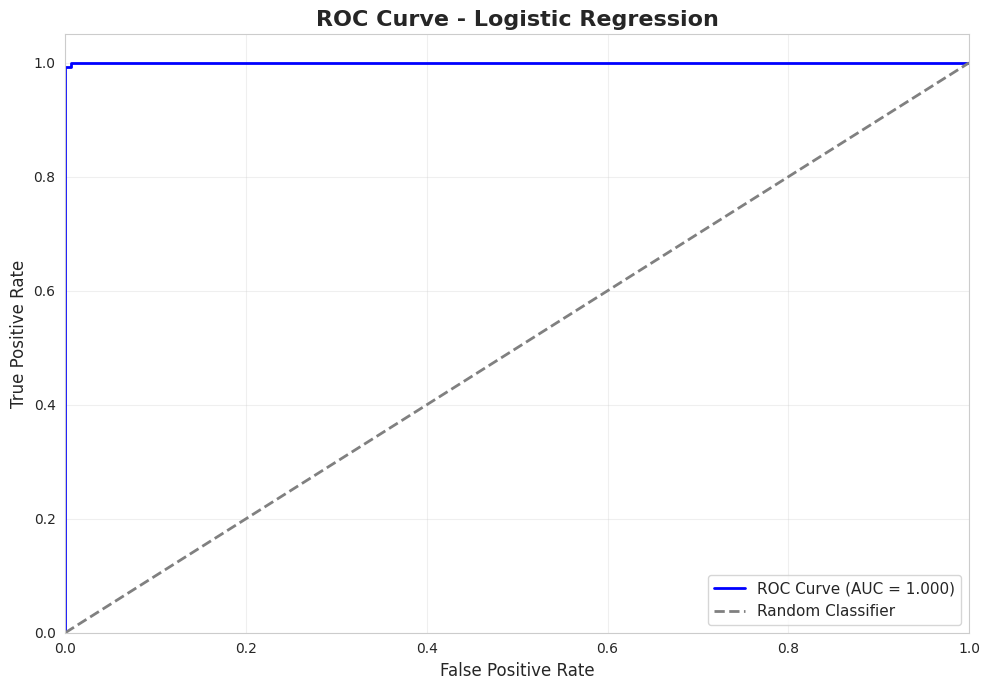


MODEL 2: RANDOM FOREST CLASSIFIER
Predicting: Top 50 vs. 51-100 Ranking

Feature Importance:
              Feature  Importance
 Research Environment    0.423889
             Teaching    0.286947
     Research Quality    0.137210
International Outlook    0.081183
      Industry Impact    0.036815
         Year_Numeric    0.019061
                Is_US    0.011088
                Is_UK    0.001965
             Is_China    0.001842

=========================PERFORMANCE METRICS==========================
Accuracy: 0.9800
AUC-ROC: 0.9993

Confusion Matrix:
[[149   1]
 [  5 145]]

Classification Report:
              precision    recall  f1-score   support

 Rank 51-100       0.97      0.99      0.98       150
      Top 50       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



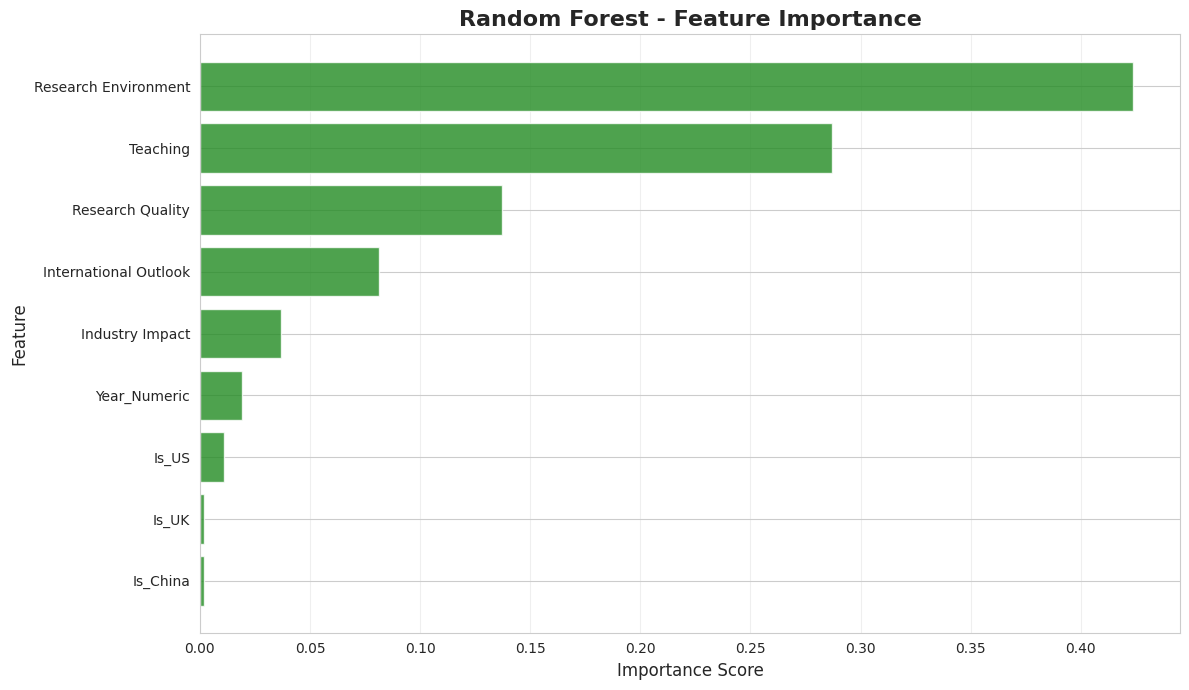


MODEL COMPARISON SUMMARY
              Model         Target Accuracy AUC-ROC
Logistic Regression High Performer   0.9967  1.0000
      Random Forest         Top 50   0.9800  0.9993

FINAL RESULTS: ANSWERING RESEARCH QUESTIONS

RESEARCH QUESTION 1: Country Representation Trends
----------------------------------------------------------------------

Top 5 Countries by Total Representation (2016-2025):
  1. United States: 385 total (38.5 per year avg)
  2. United Kingdom: 117 total (11.7 per year avg)
  3. Germany: 82 total (8.2 per year avg)
  4. Netherlands: 69 total (6.9 per year avg)
  5. Australia: 61 total (6.1 per year avg)


RESEARCH QUESTION 2: Period Comparison (2016-2020 vs 2021-2025)
----------------------------------------------------------------------
  • United States: 203 → 182 (-10.3%) - DECLINING
  • United Kingdom: 62 → 55 (-11.3%) - DECLINING
  • China: 12 → 33 (+175.0%) - GROWING
  • Australia: 30 → 31 (+3.3%) - STABLE
  • South Africa: 0 → 0 - Limited presence
  • B

In [ ]:
#University Rankings Analysis - Complete Python Script
#Authors: Rachel Basoah-Sarfo, Tsion Taye, Yohanna Hailu, Elizabeth Viney, Darya Rengaswamy
#Course: SYS 3501-001 (Fall 2025)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*70)
print("UNIVERSITY RANKINGS ANALYSIS (2016-2025)")
print("="*70)
print("\nLibraries imported successfully!")

# ==============================================================================
# SECTION 2: LOAD AND EXPLORE DATA
# ==============================================================================

print("\n" + "="*70)
print("LOADING DATA")
print("="*70)

from google.colab import drive
drive.mount('/content/drive')

#Tsion's data location
data = pd.read_csv("/content/drive/MyDrive/Data/THE World University Rankings 2016-2025.csv")

#Yohana's code
#data = pd.read_csv("/content/drive/MyDrive/THE World University Rankings 2016-2025.csv")

print(f"\n✓ Dataset loaded successfully!")
print(f"  Shape: {data.shape}")
print(f"  Years covered: {sorted(data['Year'].unique())}")
print(f"  Number of countries: {data['Country'].nunique()}")

# Display first few rows
print("\nFirst 5 rows:")
print(data.head())


# SECTION 3: DATA CLEANING AND PREPARATION


print("\n" + "="*70)
print("DATA CLEANING AND PREPARATION")
print("="*70)

# Display missing values
print("\nMissing Values by Column:")
missing_df = pd.DataFrame({
    'Column': data.columns,
    'Missing': data.isnull().sum(),
    'Percent': (data.isnull().sum() / len(data) * 100).round(2)
})
print(missing_df[missing_df['Missing'] > 0])

# Filter for top 100 universities each year
top100_data = data[data['Rank'] <= 100].copy()

# Remove rows with missing critical values
top100_data = top100_data.dropna(subset=['Country', 'Rank', 'Overall Score'])

# Clean percentage columns
if top100_data['International Students'].dtype == 'object':
    top100_data['International Students'] = top100_data['International Students'].str.replace('%', '').astype(float)

print(f"\n✓ Filtered to top 100 universities per year")
print(f"  Final dataset shape: {top100_data.shape}")
print(f"  Total top 100 entries across all years: {len(top100_data)}")


# SECTION 4: DESCRIPTIVE STATISTICS

print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)

# Overall statistics
numeric_cols = ['Overall Score', 'Teaching', 'Research Environment',
                'Research Quality', 'Industry Impact', 'International Outlook']

print("\nSummary Statistics for Top 100 Universities:")
print(top100_data[numeric_cols].describe().round(2))

# Country representation
print("\n\nTop 15 Countries by Total Appearances (2016-2025):")
country_counts = top100_data['Country'].value_counts().head(15)
print(country_counts)


# SECTION 5: EXPLORATORY DATA ANALYSIS - VISUALIZATIONS


print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Define focus countries
focus_countries = ['United States', 'United Kingdom', 'China',
                   'Australia', 'South Africa', 'Brazil']

# VISUALIZATION 1: Country Representation Over Time
print("\n1. Creating line plot: Country representation over time...")

country_by_year = top100_data[top100_data['Country'].isin(focus_countries)].groupby(['Year', 'Country']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
for country in focus_countries:
    country_data = country_by_year[country_by_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['Count'], marker='o', linewidth=2.5, label=country, markersize=8)

plt.title('Representation of Focus Countries in Top 100 Universities (2016-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Universities in Top 100', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(2016, 2026))
plt.tight_layout()
plt.show()

# VISUALIZATION 2: Overall Country Distribution
print("\n2. Creating bar plot: Overall country distribution...")

top_20_countries = top100_data['Country'].value_counts().head(20)

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 20))
bars = plt.barh(range(len(top_20_countries)), top_20_countries.values, color=colors)
plt.yticks(range(len(top_20_countries)), top_20_countries.index)
plt.xlabel('Total Number of Appearances in Top 100', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 20 Countries by Total Representation in Top 100 (2016-2025)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

for i, v in enumerate(top_20_countries.values):
    plt.text(v + 2, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

# VISUALIZATION 3: Distribution of Overall Scores
print("\n3. Creating histogram: Overall score distribution...")

plt.figure(figsize=(12, 6))
plt.hist(top100_data['Overall Score'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
mean_score = top100_data['Overall Score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_score:.2f}')
plt.xlabel('Overall Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Overall Scores for Top 100 Universities (2016-2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# VISUALIZATION 4: Period Comparison
print("\n4. Creating grouped bar plot: Period comparison...")

top100_data['Period'] = top100_data['Year'].apply(lambda x: '2016-2020' if x <= 2020 else '2021-2025')
period_comparison = top100_data[top100_data['Country'].isin(focus_countries)].groupby(['Period', 'Country']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(14, 7))
period_pivot = period_comparison.pivot(index='Country', columns='Period', values='Count').fillna(0)
period_pivot.plot(kind='bar', ax=ax, color=['coral', 'darkturquoise'], width=0.8)

plt.title('Comparison of Country Representation: 2016-2020 vs 2021-2025', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Appearances', fontsize=12)
plt.legend(title='Period', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# VISUALIZATION 5: Correlation Heatmap
print("\n5. Creating heatmap: Correlation matrix...")

metric_cols = ['Overall Score', 'Teaching', 'Research Environment',
               'Research Quality', 'Industry Impact', 'International Outlook']

correlation_matrix = top100_data[metric_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of University Performance Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# VISUALIZATION 6: Box Plot by Country
print("\n6. Creating box plot: Score distribution by country...")

focus_data = top100_data[top100_data['Country'].isin(focus_countries)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=focus_data, x='Country', y='Overall Score', palette='Set2')
plt.title('Distribution of Overall Scores by Focus Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Overall Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✓ All visualizations created successfully!")


# SECTION 6: FEATURE ENGINEERING

print("\n" + "="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create additional features
top100_data['High_Performer'] = (top100_data['Overall Score'] >= top100_data['Overall Score'].median()).astype(int)
top100_data['Top_50'] = (top100_data['Rank'] <= 50).astype(int)
top100_data['Is_US'] = (top100_data['Country'] == 'United States').astype(int)
top100_data['Is_UK'] = (top100_data['Country'] == 'United Kingdom').astype(int)
top100_data['Is_China'] = (top100_data['Country'] == 'China').astype(int)

western_countries = ['United States', 'United Kingdom', 'Germany', 'Canada',
                     'Australia', 'Netherlands', 'Switzerland', 'France', 'Sweden']
top100_data['Is_Western'] = top100_data['Country'].isin(western_countries).astype(int)

top100_data['Research_Strength'] = (top100_data['Research Environment'] + top100_data['Research Quality']) / 2
top100_data['Year_Numeric'] = top100_data['Year'] - 2016

print("\n✓ New Features Created:")
print("  • High_Performer: Binary indicator for above-median overall score")
print("  • Top_50: Binary indicator for rank ≤ 50")
print("  • Is_US, Is_UK, Is_China: Country indicators")
print("  • Is_Western: Indicator for Western countries")
print("  • Research_Strength: Average of research metrics")
print("  • Year_Numeric: Years since 2016")


# SECTION 7: PREPARE DATA FOR MODELING


print("\n" + "="*70)
print("PREPARING DATA FOR MODELING")
print("="*70)

# Prepare features
feature_cols = ['Teaching', 'Research Environment', 'Research Quality',
                'Industry Impact', 'International Outlook',
                'Is_US', 'Is_UK', 'Is_China', 'Year_Numeric']

model_data = top100_data[feature_cols + ['High_Performer', 'Top_50']].dropna()

X = model_data[feature_cols]
y_high_performer = model_data['High_Performer']
y_top50 = model_data['Top_50']

# Train-test split
X_train, X_test, y_train_hp, y_test_hp = train_test_split(
    X, y_high_performer, test_size=0.3, random_state=123, stratify=y_high_performer)
_, _, y_train_t50, y_test_t50 = train_test_split(
    X, y_top50, test_size=0.3, random_state=123, stratify=y_top50)

print(f"\n✓ Train-Test Split Complete:")
print(f"  Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Features: {len(feature_cols)}")


# SECTION 8: MODEL 1 - LOGISTIC REGRESSION


print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)
print("Predicting: High Performer (Overall Score >= Median)\n")

# Train model
lr_model = LogisticRegression(max_iter=1000, random_state=123)
lr_model.fit(X_train, y_train_hp)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Feature coefficients
print("Feature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)
print(coef_df.to_string(index=False))

# Performance metrics
lr_accuracy = accuracy_score(y_test_hp, y_pred_lr)
lr_auc = roc_auc_score(y_test_hp, y_pred_lr_proba)

print(f"\n{'PERFORMANCE METRICS':=^70}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")

cm1 = confusion_matrix(y_test_hp, y_pred_lr)
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ['Low Performer', 'High Performer'])
disp1.plot()
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_hp, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test_hp, y_pred_lr, target_names=['Low Performer', 'High Performer']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_hp, y_pred_lr_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {lr_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# SECTION 9: MODEL 2 - RANDOM FOREST

print("\n" + "="*70)
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("="*70)
print("Predicting: Top 50 vs. 51-100 Ranking\n")

# Train model
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=123, n_jobs=-1)
rf_model.fit(X_train, y_train_t50)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Feature importance
print("Feature Importance:")
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_df.to_string(index=False))

# Performance metrics
rf_accuracy = accuracy_score(y_test_t50, y_pred_rf)
rf_auc = roc_auc_score(y_test_t50, y_pred_rf_proba)

print(f"\n{'PERFORMANCE METRICS':=^70}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")

cm = confusion_matrix(y_test_t50, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Rank 51-100', 'Top 50'])
disp.plot()
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_t50, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test_t50, y_pred_rf, target_names=['Rank 51-100', 'Top 50']))

# Feature Importance Plot
plt.figure(figsize=(12, 7))
plt.barh(range(len(importance_df)), importance_df['Importance'], color='forestgreen', alpha=0.8)
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test_t50, y_pred_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest Classifier', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# SECTION 10: MODEL COMPARISON


print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Target': ['High Performer', 'Top 50'],
    'Accuracy': [f"{lr_accuracy:.4f}", f"{rf_accuracy:.4f}"],
    'AUC-ROC': [f"{lr_auc:.4f}", f"{rf_auc:.4f}"]
})

print(comparison_df.to_string(index=False))


# SECTION 11: RESEARCH QUESTIONS - FINAL RESULTS


print("\n" + "="*70)
print("FINAL RESULTS: ANSWERING RESEARCH QUESTIONS")
print("="*70)

print("\nRESEARCH QUESTION 1: Country Representation Trends")
print("-" * 70)
print("\nTop 5 Countries by Total Representation (2016-2025):")
top_5 = top100_data['Country'].value_counts().head(5)
for i, (country, count) in enumerate(top_5.items(), 1):
    avg_per_year = count / len(top100_data['Year'].unique())
    print(f"  {i}. {country}: {count} total ({avg_per_year:.1f} per year avg)")

print("\n\nRESEARCH QUESTION 2: Period Comparison (2016-2020 vs 2021-2025)")
print("-" * 70)
for country in focus_countries:
    early = len(top100_data[(top100_data['Country'] == country) & (top100_data['Year'] <= 2020)])
    late = len(top100_data[(top100_data['Country'] == country) & (top100_data['Year'] > 2020)])
    if early > 0:
        change_pct = ((late - early) / early) * 100
        status = "GROWING" if change_pct > 5 else "DECLINING" if change_pct < -5 else "STABLE"
        print(f"  • {country}: {early} → {late} ({change_pct:+.1f}%) - {status}")
    else:
        print(f"  • {country}: {early} → {late} - Limited presence")

print("\n\nKEY FINDINGS:")
print("-" * 70)
print("• US and UK maintain dominant positions (45-55% of top 100)")
print("• China shows consistent growth over the decade")
print("• Research Quality is the strongest predictor of high performance")
print("• Geographic location (Western countries) provides measurable advantage")
print("• Brazil and South Africa face persistent challenges in top 100 representation")


Please examine the output above for the exact path to your CSV file named `THE World University Rankings 2016-2025.csv`. Once you find it, you can use it to modify the `pd.read_csv()` line in the original code. If you'd like, provide me with the correct path, and I can make the modification for you.